# Transfer Learning in Keras

In this notebook, we'll cover how to load a pre-trained model (in this case, VGGNet19) and finetune it for a new task: detecting hot dogs.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NSC-BS-CS/CSB410_Labs/blob/main/BookLabs/7-transfer_learning_in_keras.ipynb)


## Warning
You will need to download the dataset on Kaggle located at the URL below, then create the proper folder structure for this code to work
(see screenshot below)

https://www.kaggle.com/datasets/dansbecker/hot-dog-not-hot-dog?resource=download

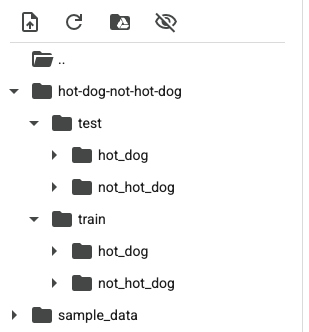

#### Load dependencies


In [19]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Load the pre-trained VGG19 model


In [20]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

#### Freeze all the layers in the base VGGNet19 model


In [21]:
for layer in vgg19.layers:
    layer.trainable = False

#### Add custom classification layers


In [22]:
# Instantiate the sequential model and add the VGG19 model:
model = Sequential()
model.add(vgg19)

# Add the custom layers atop the VGG19 model:
model.add(Flatten(name='flattened'))
model.add(Dropout(0.5, name='dropout'))
model.add(Dense(2, activation='softmax', name='predictions'))

#### Compile the model for training


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Prepare the data for training


The dataset is available for download [here](https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog/home).


In [24]:
# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [25]:
# Define the batch size:
batch_size=32

In [26]:
# Define the train and validation generators:
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog-not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog-not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
model.fit(train_generator, steps_per_epoch=15,
                    epochs=16, validation_data=valid_generator,
                    validation_steps=15)

Epoch 1/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step - accuracy: 0.5357 - loss: 0.8668 - val_accuracy: 0.7604 - val_loss: 0.5214
Epoch 2/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6250 - loss: 0.8205 - val_accuracy: 0.6458 - val_loss: 0.7752
Epoch 3/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.7042 - loss: 0.7741 - val_accuracy: 0.7667 - val_loss: 0.5087
Epoch 4/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7188 - loss: 0.7051 - val_accuracy: 0.7542 - val_loss: 0.5302
Epoch 5/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.8195 - loss: 0.3898 - val_accuracy: 0.7917 - val_loss: 0.4499
Epoch 6/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8125 - loss: 0.4342 - val_accuracy: 0.7792 - val_loss: 0.4613
Epoch 7/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.7852 - loss: 0.4657 - val_accuracy: 0.7771 - val_loss: 0.4989
Epoch 8/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8438 - loss: 0.3966 - val_accuracy: 0.766